<a href="https://colab.research.google.com/github/McNealFielies/McNealFielies.github.io/blob/main/Lung_Cancer_Hyperparamater_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Classifiers**: Explotory Data Analysis, Model Selection and Tuning for Optimal Performance

# **Attribute information:**

Gender: M(Male), F(Female)

Age: Age of the patient

Smoking: Yes=2 , No=1.

Yellow fingers: Yes=2 , No=1.

Anxiety: Yes=2 , No=1.

Peer_pressure: Yes=2 , No=1.

Chronic Disease: Yes=2 , No=1.

Fatigue: Yes=2 , No=1.

Allergy: Yes=2 , No=1.

Wheezing: Yes=2 , No=1.

Alcohol: Yes=2 , No=1.

Coughing: Yes=2 , No=1.

Shortness of Breath: Yes=2 , No=1.

Swallowing Difficulty: Yes=2 , No=1.

Chest pain: Yes=2 , No=1.

Lung Cancer: Yes , No

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# importing the models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
# Importing the Lung Disease Data into a Pandas DataFrame

df = pd.read_csv('/content/survey lung cancer.csv')

In [30]:
# Looking at the first 5 rows

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [31]:
# Let's see if there are any missing values in the dataset

df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [32]:
df['LUNG_CANCER'].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [33]:
# Let's have a look at the statitstical analysis

df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


<Axes: xlabel='LUNG_CANCER', ylabel='AGE'>

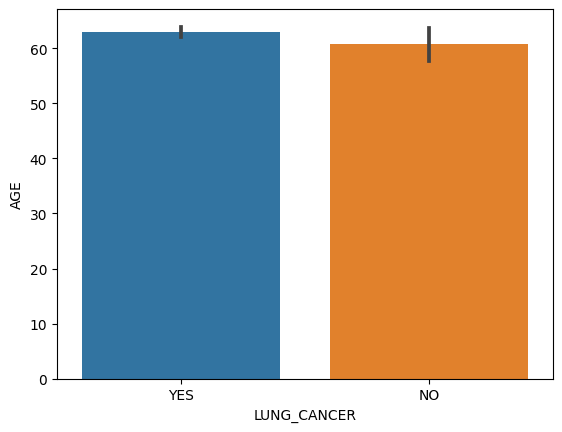

In [34]:
sns.barplot(x="LUNG_CANCER", y='AGE', data=df)

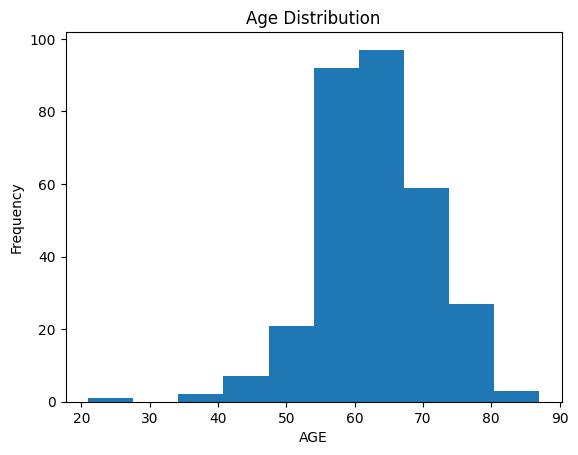

In [35]:
# Plot a histogram of the 'age' column
plt.hist(df['AGE'], bins=10)
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

**Changing Categorical Values into Numerical Values**

In [36]:
# To change categorical values to Numerical Values we going to use labelencoder

le = LabelEncoder()

In [37]:
df["LUNG_CANCER"] = le.fit_transform(df["LUNG_CANCER"])
df["GENDER"] = le.fit_transform(df["GENDER"])

In [38]:
# We can see in the below code that the change has been made

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


# **Data Pre-Processing**

In [39]:
x =  df.drop(columns=['LUNG_CANCER'], axis=1)
y = df['LUNG_CANCER']

In [40]:
print(x)
print(y)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         0   59        1               1        1              2   
3         1   63        2               2        2              1   
4         0   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       0   56        1               1        1              2   
305       1   70        2               1        1              1   
306       1   58        2               1        1              1   
307       1   67        2               1        2              1   
308       1   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2     

In the above code we can see that our data has been spitted into features and targets

# **Splitting the Data into Training and Testing**

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=200)

In [42]:
# Let's see if the test data has been splitted

print(x.shape, x_test.shape, x_train.shape,)

(309, 15) (62, 15) (247, 15)


# **Standardize the Data**

In [43]:
scaler = StandardScaler()

In [44]:
scaler.fit(x_train)

StandardScaler()

# **Model**


In [45]:
# The list of models

model_list = [LogisticRegression(max_iter=10000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [46]:
# Creating a dictionary that has Hyperparameter values for the models above

model_hyperparameters = {


    'log_reg_hyperparameter':{


          'C' : [1,5,10,20],
          'penalty' : ['none', 'l1', 'l2', 'elasticnet'],

   },


    'svc_hyperparameters':{

        'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
         'C' : [1,5,10,20]

    },


    'KNN_hyperparameter' : {

       'n_neighbors' : [3,5,10]



    },

    'random_forest_hyperparameter': {


                                     'n_estimators' : [10,20,50,100]
    },
}

In [47]:
type(model_hyperparameters)

dict

In [48]:
print(model_hyperparameters.keys())

dict_keys(['log_reg_hyperparameter', 'svc_hyperparameters', 'KNN_hyperparameter', 'random_forest_hyperparameter'])


In [49]:
print(model_hyperparameters.values())

dict_values([{'C': [1, 5, 10, 20], 'penalty': ['none', 'l1', 'l2', 'elasticnet']}, {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}, {'n_neighbors': [3, 5, 10]}, {'n_estimators': [10, 20, 50, 100]}])


In [50]:
model_keys = list(model_hyperparameters.keys())

In [51]:
print(model_keys)

['log_reg_hyperparameter', 'svc_hyperparameters', 'KNN_hyperparameter', 'random_forest_hyperparameter']


In [52]:
model_hyperparameters['svc_hyperparameters']

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}

# **Apply GridSeachCV**

In [53]:
def ModelSelection(list_of_models, Hyperparameter_dictionary):

  result = []

  i = 0

  for model in list_of_models:
    key = model_keys[i]

    params = Hyperparameter_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('------------------------------------------------------------------')

    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    classifier.fit(x,y)

    result.append({

                   'model used' : model,
                   'highest_score' : classifier.best_score_,
                   'best hyperparameter' : classifier.best_params_
    })

    result_dataframe = pd.DataFrame(result, columns= ['model used','highest_score', 'best hyperparameter'])

  return result_dataframe

In [54]:
ModelSelection(model_list, model_hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20], 'penalty': ['none', 'l1', 'l2', 'elasticnet']}
------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
------------------------------------------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
------------------------------------------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}
------------------------------------------------------------------


,model used,highest_score,best hyperparameter
0,LogisticRegression(max_iter=10000),0.922422,"{'C': 20, 'penalty': 'l2'}"
1,SVC(),0.922475,"{'C': 1, 'kernel': 'linear'}"
2,KNeighborsClassifier(),0.886779,{'n_neighbors': 3}
3,RandomForestClassifier(random_state=0),0.919196,{'n_estimators': 50}


# **Conclustion:**


The **Logistic Regression** model achieved the highest score of 0.922422 with the best hyperparameters {'C': 20, 'penalty': 'l2'}. This indicates that using a higher value of C and applying L2 penalty regularization led to the optimal performance for this model.

The **Support Vector Classifier (SVC)** obtained a slightly higher score of 0.922475 compared to Logistic Regression. The best hyperparameters for SVC were {'C': 1, 'kernel': 'linear'}. This suggests that using a linear kernel and a smaller value of C resulted in the best performance for SVC.

The **K-Nearest Neighbors (KNN) Classifier** achieved a score of 0.886779, which was lower than the previous models. The best hyperparameter {'n_neighbors': 3} indicates that considering three nearest neighbors yielded the best performance for this model.

The **Random Forest Classifier** achieved a score of 0.919196 with the best hyperparameter {'n_estimators': 50}. This suggests that using 50 decision trees in the random forest ensemble led to the highest accuracy for this classifier.

In conclusion, the Logistic Regression and SVC models performed the best, achieving similar high scores. Depending on the specific requirements and characteristics of the problem, either of these models can be selected. The KNN Classifier had a slightly lower accuracy, while the Random Forest Classifier also performed well but did not reach the highest score.